<a href="https://colab.research.google.com/github/AlenZhang-Dev/Learning-Records/blob/master/Machine%20Learning/Deep%20Learning%20with%20Python/3.4%20%E7%94%B5%E5%BD%B1%E8%AF%84%E8%AE%BA%E5%88%86%E7%B1%BB%E3%80%90%E4%BA%8C%E5%88%86%E7%B1%BB%E3%80%91.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 电影评论分类：二分类问题
二分类是应用最广泛的机器学习问题。本例将根据电影评论的文字内容将其划分为正面或负面。

## IMDB数据集
使用IMDB数据集，包含来自互联网电影数据库的50000条严重两集分化的评论。数据集被分为用于训练的25000条评论与用于测试的25000条评论。训练集和测试集都包含50%的正面评论和50%的负面评论。

In [1]:
from keras.datasets import imdb

(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

train_data[0]
train_labels[0]

1

## 数据准备
你不能将整数序列直接输入神经网络。你需要将列表转换为张量。转换方法有以下两种

1.   填充列表，使其具有相同长度。再将列表转换成形状为(samples, word_indices)的整数张量，然后网络的第一层使用能处理这种张量整数张量的层。
2.   对列表进行one-hot编码，将其转换为0和1组成的向量。序列[3,5]将会被转换为10000维的向量，只有索引为3和5的元素是1，其余都是0。然后网络的第一层可以用Dense，他可以处理浮点向量数据。

以下使用方法2准备数据



In [2]:
import numpy as np
def vectorize_sequences(sequences, dimension=10000):
    # Create an all-zero matrix of shape (len(sequences), dimension)
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.  # set specific indices of results[i] to 1s
    return results

# Our vectorized training data
x_train = vectorize_sequences(train_data)
# Our vectorized test data
x_test = vectorize_sequences(test_data)

x_train[0]

# 将标签向量化
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

## 构建网络
输入数据是向量，而标签是标量（0和1），这是遇到的最好情况。在该模型中我们使用以下架构
1.  两个中间层，每层有16个隐藏变量
2.  第三层输出一个标量，预测当前评论的情感
中间层使用relu作为激活函数，最后一层使Sigmoid函数激活输出一个0-1范围内的概率。

In [3]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

以下选择损失函数和优化器。二分类问题的网络输出是一个概率值，最好使用binary_crossentropy(二元交叉熵)损失，这并不是唯一可行的选择，还可以使用mean_squared_error（均方误差）。对于输出概率的值，交叉熵往往是最好的选择。

## 编译模型
因为rmsprop、binary_crossentropy和accuracy都是Keras内置的一部分。可以通过optimzer参数传入一个优化器累实现。

In [4]:
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

## 配置优化器


In [5]:
from keras import optimizers
model.compile(optimizer=optimizers.RMSprop(lr=0.001),
              loss='binary_crossentropy',
              metrics=['accuracy'])

使用自定义的损失和指标。

In [6]:
# from keras import losses
# from keras import metrics

# model.compile(optimizer=optimizers.RMSprop(lr=0.001),
#               loss=losses.binary_crossentropy,
#               metrics=[metrics.binary_accuracy])

## 验证
留出验证集并进行训练

In [7]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [8]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
30/30 [==============================] - 2s 56ms/step - loss: 0.4962 - accuracy: 0.7847 - val_loss: 0.3648 - val_accuracy: 0.8753
Epoch 2/20
30/30 [==============================] - 1s 42ms/step - loss: 0.2904 - accuracy: 0.9069 - val_loss: 0.3006 - val_accuracy: 0.8863
Epoch 3/20
30/30 [==============================] - 1s 42ms/step - loss: 0.2180 - accuracy: 0.9280 - val_loss: 0.2781 - val_accuracy: 0.8910
Epoch 4/20
30/30 [==============================] - 1s 43ms/step - loss: 0.1707 - accuracy: 0.9469 - val_loss: 0.2761 - val_accuracy: 0.8878
Epoch 5/20
30/30 [==============================] - 1s 42ms/step - loss: 0.1402 - accuracy: 0.9549 - val_loss: 0.2847 - val_accuracy: 0.8861
Epoch 6/20
30/30 [==============================] - 1s 42ms/step - loss: 0.1136 - accuracy: 0.9659 - val_loss: 0.3080 - val_accuracy: 0.8854
Epoch 7/20
30/30 [==============================] - 1s 42ms/step - loss: 0.0939 - accuracy: 0.9725 - val_loss: 0.3438 - val_accuracy: 0.8749
Epoch 8/20
30

以下字典中的四个指标对应训练过程中的验证过程和监控指标。以下为对数据进行可视化

In [9]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

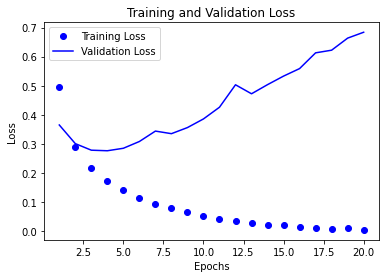

In [10]:
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

# "bo" is for "blue dot"
plt.plot(epochs, loss, 'bo', label='Training Loss')
# b is for "solid blue line"
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

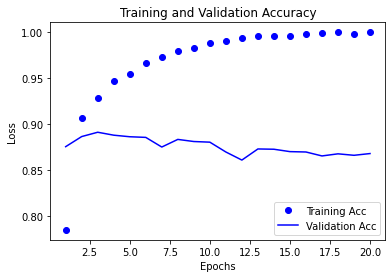

In [11]:
plt.clf()   # clear figure
acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']

plt.plot(epochs, acc, 'bo', label='Training Acc')
plt.plot(epochs, val_acc, 'b', label='Validation Acc')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

然后从头开始训练一个网络


In [12]:
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

history_original = model.fit(x_train, y_train, epochs=4, batch_size=512, validation_data=(x_val, y_val))
results = model.evaluate(x_test, y_test)

Epoch 1/4
49/49 [==============================] - 2s 48ms/step - loss: 0.4639 - accuracy: 0.8229 - val_loss: 0.3034 - val_accuracy: 0.9076
Epoch 2/4
49/49 [==============================] - 2s 40ms/step - loss: 0.2708 - accuracy: 0.9082 - val_loss: 0.2267 - val_accuracy: 0.9217
Epoch 3/4
49/49 [==============================] - 2s 39ms/step - loss: 0.2087 - accuracy: 0.9272 - val_loss: 0.1653 - val_accuracy: 0.9493
Epoch 4/4
782/782 [==============================] - 2s 2ms/step - loss: 0.2869 - accuracy: 0.8864


In [13]:
results

[0.2869228422641754, 0.8864399790763855]

使用训练好的网路在新数据上生成预测结果

In [14]:
model.predict(x_test)

array([[0.20975155],
       [0.999835  ],
       [0.93700194],
       ...,
       [0.11754999],
       [0.0749051 ],
       [0.54305625]], dtype=float32)

## 进一步实验
通过以下实现，你可以确信前面选择的网络架构挺合理，但还有改进空间。
* 尝试使用一个或3个以上的隐藏层，观察对验证精度和测试精度的影响。
* 尝试使用更少的隐藏单元。
* 尝试使用mse损失函数代替binary_crosseentropy。
* 尝试使用tanh激活（该激活函数在神经网络早期流行）代替relu。

### 减少网络容量

In [15]:
model = models.Sequential()
model.add(layers.Dense(4, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(4, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])


history_tiny = model.fit(x_train, y_train, epochs=20, batch_size=512, validation_data=(x_val, y_val))
results = model.evaluate(x_test, y_test)

Epoch 1/20
49/49 [==============================] - 2s 41ms/step - loss: 0.5910 - accuracy: 0.7091 - val_loss: 0.4987 - val_accuracy: 0.8448
Epoch 2/20
49/49 [==============================] - 2s 36ms/step - loss: 0.4642 - accuracy: 0.8649 - val_loss: 0.3900 - val_accuracy: 0.9199
Epoch 3/20
49/49 [==============================] - 2s 35ms/step - loss: 0.3268 - accuracy: 0.9122 - val_loss: 0.2559 - val_accuracy: 0.9344
Epoch 4/20
49/49 [==============================] - 2s 34ms/step - loss: 0.2384 - accuracy: 0.9279 - val_loss: 0.1993 - val_accuracy: 0.9423
Epoch 5/20
49/49 [==============================] - 2s 34ms/step - loss: 0.1974 - accuracy: 0.9372 - val_loss: 0.1695 - val_accuracy: 0.9501
Epoch 6/20
49/49 [==============================] - 2s 34ms/step - loss: 0.1735 - accuracy: 0.9441 - val_loss: 0.1488 - val_accuracy: 0.9568
Epoch 7/20
49/49 [==============================] - 2s 35ms/step - loss: 0.1542 - accuracy: 0.9505 - val_loss: 0.1328 - val_accuracy: 0.9626
Epoch 8/20
49

In [16]:
history_dict = history_tiny.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

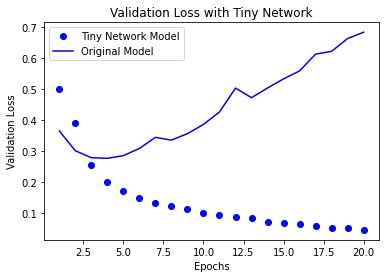

In [17]:
import matplotlib.pyplot as plt

acc_tiny = history_tiny.history['accuracy']
val_acc_tiny = history_tiny.history['val_accuracy']
loss_tiny = history_tiny.history['loss']
val_loss_tiny = history_tiny.history['val_loss']

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

# "bo" is for "blue dot"
plt.plot(epochs, val_loss_tiny, 'bo', label='Tiny Network Model')
# b is for "solid blue line"
plt.plot(epochs, val_loss, 'b', label='Original Model')
plt.title('Validation Loss with Tiny Network')
plt.xlabel('Epochs')
plt.ylabel('Validation Loss')
plt.legend()

plt.show()

### 增大网络容量


In [18]:
model = models.Sequential()
model.add(layers.Dense(256, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])


history_huge = model.fit(x_train, y_train, epochs=20, batch_size=512, validation_data=(x_val, y_val))
results = model.evaluate(x_test, y_test)

Epoch 1/20
49/49 [==============================] - 8s 157ms/step - loss: 0.4416 - accuracy: 0.8027 - val_loss: 0.2066 - val_accuracy: 0.9310
Epoch 2/20
49/49 [==============================] - 8s 155ms/step - loss: 0.2292 - accuracy: 0.9100 - val_loss: 0.1361 - val_accuracy: 0.9615
Epoch 3/20
49/49 [==============================] - 8s 154ms/step - loss: 0.1476 - accuracy: 0.9444 - val_loss: 0.0691 - val_accuracy: 0.9798
Epoch 4/20
49/49 [==============================] - 8s 154ms/step - loss: 0.0786 - accuracy: 0.9720 - val_loss: 0.0289 - val_accuracy: 0.9932
Epoch 5/20
49/49 [==============================] - 8s 155ms/step - loss: 0.0529 - accuracy: 0.9855 - val_loss: 0.0073 - val_accuracy: 0.9991
Epoch 6/20
49/49 [==============================] - 8s 155ms/step - loss: 0.0496 - accuracy: 0.9892 - val_loss: 0.0035 - val_accuracy: 0.9996
Epoch 7/20
49/49 [==============================] - 8s 155ms/step - loss: 0.0468 - accuracy: 0.9909 - val_loss: 0.0049 - val_accuracy: 0.9999
Epoch 

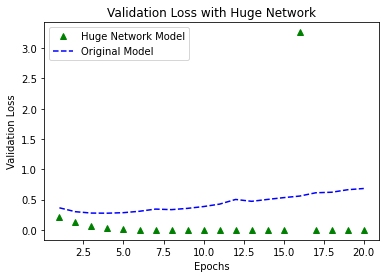

In [19]:
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

acc_huge = history_huge.history['accuracy']
val_acc_huge = history_huge.history['val_accuracy']
loss_huge = history_huge.history['loss']
val_loss_huge = history_huge.history['val_loss']

epochs = range(1, len(acc) + 1)

# "g^" if for "green triangles"
plt.plot(epochs, val_loss_huge, 'g^', label='Huge Network Model')
# "b--" is for "solid blue dashes"
plt.plot(epochs, val_loss, 'b--', label='Original Model')
plt.title('Validation Loss with Huge Network')
plt.xlabel('Epochs')
plt.ylabel('Validation Loss')
plt.legend()

plt.show()

### 添加权重正则化

In [20]:
# 添加权重l2正则化
from keras import regularizers

model = models.Sequential()
model.add(layers.Dense(16, kernel_regularizer=regularizers.l2(0.001) ,activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, kernel_regularizer=regularizers.l2(0.001) ,activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [21]:
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])


history_regularizers = model.fit(x_train, y_train, epochs=20, batch_size=512, validation_data=(x_val, y_val))
results = model.evaluate(x_test, y_test)

Epoch 1/20
49/49 [==============================] - 2s 49ms/step - loss: 0.5206 - accuracy: 0.8116 - val_loss: 0.3525 - val_accuracy: 0.9046
Epoch 2/20
49/49 [==============================] - 2s 41ms/step - loss: 0.3282 - accuracy: 0.8999 - val_loss: 0.2745 - val_accuracy: 0.9253
Epoch 3/20
49/49 [==============================] - 2s 40ms/step - loss: 0.2807 - accuracy: 0.9174 - val_loss: 0.2438 - val_accuracy: 0.9362
Epoch 4/20
49/49 [==============================] - 2s 40ms/step - loss: 0.2576 - accuracy: 0.9264 - val_loss: 0.2232 - val_accuracy: 0.9477
Epoch 5/20
49/49 [==============================] - 2s 41ms/step - loss: 0.2462 - accuracy: 0.9305 - val_loss: 0.2151 - val_accuracy: 0.9487
Epoch 6/20
49/49 [==============================] - 2s 40ms/step - loss: 0.2365 - accuracy: 0.9352 - val_loss: 0.2026 - val_accuracy: 0.9569
Epoch 7/20
49/49 [==============================] - 2s 41ms/step - loss: 0.2302 - accuracy: 0.9378 - val_loss: 0.1986 - val_accuracy: 0.9570
Epoch 8/20
49

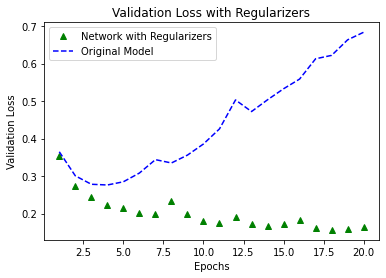

In [22]:
# original data
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

# training data
acc_regularizers = history_regularizers.history['accuracy']
val_acc_regularizers = history_regularizers.history['val_accuracy']
loss_regularizers = history_regularizers.history['loss']
val_loss_regularizers = history_regularizers.history['val_loss']

epochs = range(1, len(acc) + 1)

# "g^" if for "green triangles"
plt.plot(epochs, val_loss_regularizers, 'g^', label='Network with Regularizers')
# "b--" is for "solid blue dashes"
plt.plot(epochs, val_loss, 'b--', label='Original Model')
plt.title('Validation Loss with Regularizers')
plt.xlabel('Epochs')
plt.ylabel('Validation Loss')
plt.legend()

plt.show()

### 添加dropout正则化

In [23]:
odel = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(1, activation='sigmoid'))

In [24]:
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])


history_dropout = model.fit(x_train, y_train, epochs=20, batch_size=512, validation_data=(x_val, y_val))
results = model.evaluate(x_test, y_test)

Epoch 1/20
49/49 [==============================] - 2s 49ms/step - loss: 0.6830 - accuracy: 0.7728 - val_loss: 0.6545 - val_accuracy: 0.8883
Epoch 2/20
49/49 [==============================] - 2s 42ms/step - loss: 0.6309 - accuracy: 0.8288 - val_loss: 0.6071 - val_accuracy: 0.9229
Epoch 3/20
49/49 [==============================] - 2s 41ms/step - loss: 0.5814 - accuracy: 0.8596 - val_loss: 0.5429 - val_accuracy: 0.9254
Epoch 4/20
49/49 [==============================] - 2s 41ms/step - loss: 0.5287 - accuracy: 0.8788 - val_loss: 0.4557 - val_accuracy: 0.9291
Epoch 5/20
49/49 [==============================] - 2s 40ms/step - loss: 0.4851 - accuracy: 0.8905 - val_loss: 0.3968 - val_accuracy: 0.9441
Epoch 6/20
49/49 [==============================] - 2s 40ms/step - loss: 0.4447 - accuracy: 0.9013 - val_loss: 0.3559 - val_accuracy: 0.9435
Epoch 7/20
49/49 [==============================] - 2s 40ms/step - loss: 0.4201 - accuracy: 0.9050 - val_loss: 0.3280 - val_accuracy: 0.9459
Epoch 8/20
49

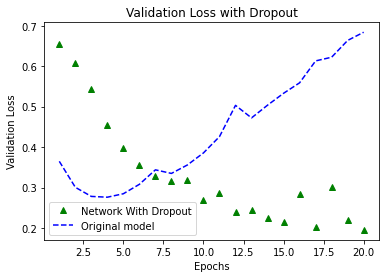

In [25]:
# original data
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

# training data
acc_dropout = history_dropout.history['accuracy']
val_acc_dropout = history_dropout.history['val_accuracy']
loss_dropout = history_dropout.history['loss']
val_loss_dropout = history_dropout.history['val_loss']

epochs = range(1, len(acc) + 1)

# "g^" if for "green triangles"
plt.plot(epochs, val_loss_dropout, 'g^', label='Network With Dropout')
# "b--" is for "solid blue dashes"
plt.plot(epochs, val_loss, 'b--', label='Original model')
plt.title('Validation Loss with Dropout')
plt.xlabel('Epochs')
plt.ylabel('Validation Loss')
plt.legend()

plt.show()

### 图表汇总

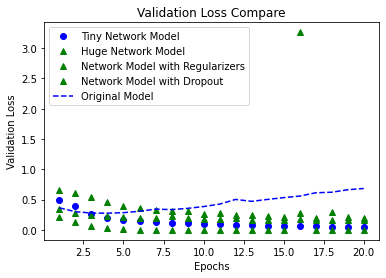

In [26]:
# "bo" is for "blue dot"
plt.plot(epochs, val_loss_tiny, 'bo', label='Tiny Network Model')
# "g^" if for "green triangles"
plt.plot(epochs, val_loss_huge, 'g^', label='Huge Network Model')
# "g^" if for "green triangles"
plt.plot(epochs, val_loss_regularizers, 'g^', label='Network Model with Regularizers')
# "g^" if for "green triangles"
plt.plot(epochs, val_loss_dropout, 'g^', label='Network Model with Dropout')
# "b--" is for "solid blue dashes"
plt.plot(epochs, val_loss, 'b--', label='Original Model')
plt.title('Validation Loss Compare')
plt.xlabel('Epochs')
plt.ylabel('Validation Loss')
plt.legend()

plt.show()

## 总结
1. 需要对原始数据进行大量的预处理，方便将其转换为张量输入到神经网络中。单词序列使用二进制向量编码，但也有别的编码方式。

2. 带有relu激活的Dense层堆叠，可以解决很多种问题。

3. 对于二分类问题，网络最后一层应该是只有一个单元并使用sigmoid激活的Dense层，网络输出应该是0～1范围内的标量，表示概率值。

4. 对于二分类问题的sigmoid标量输出，应该使用binary_crossentropy损失函数。

5. 无论问题是什么，rmsprop优化器通常都是足够好的选择。

6. 随着神经网络在训练数据上的表现越来越好，模型最终会过拟合，所以需要监控模型在训练集之外的性能。